# __Hashtags Validation__

In [1]:
import pandas as pd
from IPython.display import clear_output, display
import os, datetime
import numpy as np

In [2]:
DATA_PATH = 'data/tweets/'

week_list = [week_dir for week_dir in os.listdir(DATA_PATH) if os.path.isdir(DATA_PATH+week_dir) and not week_dir.endswith('.ipynb_checkpoints')]
print('Amount of extracted weeks: ', len(week_list))

Amount of extracted weeks:  26


In [3]:
week_list.sort()
week_list.remove('week_pr_01')
week_list.insert(week_list.index('week_12')+1, 'week_pr_01')
week_list.remove('week_pr_02')
week_list.insert(week_list.index('week_pr_01')+1, 'week_pr_02')
week_list.remove('week_pr_03')
week_list.insert(week_list.index('week_17')+1, 'week_pr_03')
week_list.remove('week_pr_04')
week_list.insert(week_list.index('week_21')+1, 'week_pr_04')

print(week_list)

['week_01', 'week_02', 'week_03', 'week_04', 'week_05', 'week_06', 'week_07', 'week_08', 'week_09', 'week_10', 'week_11', 'week_12', 'week_pr_01', 'week_pr_02', 'week_13', 'week_14', 'week_15', 'week_16', 'week_17', 'week_pr_03', 'week_18', 'week_19', 'week_20', 'week_21', 'week_pr_04', 'week_22']


In [4]:
user_list = []
hashtag_list = []

In [5]:
for week in week_list:
    clear_output(wait=True)
    print(f'Starting {week}:')
    week_df = pd.read_parquet(f'{DATA_PATH+week}/merged_{week}.parquet')
    for idx, tweet in week_df.iterrows():
        usr_name = eval(tweet['user'])['username']
        hashtags = eval(tweet['hashtags'])
        if usr_name not in user_list:
            user_list.append(usr_name)
        if hashtags:
            for hashtag in hashtags:
                hashtag_list.append(hashtag.lower())
                #hasht_low = hashtag.lower()
                #if hasht_low not in hashtag_list:
                #    hashtag_list.append(hasht_low)
    print(f'''
    Finished {week}:
    Total number of users: {len(user_list)}
    Total number of hashtags: {len(hashtag_list)}
    \n
    ''')

Starting week_22:

    Finished week_22:
    Total number of users: 472852
    Total number of hashtags: 5189068
    

    


In [6]:
user_series = pd.Series(user_list)
hashtag_series = pd.Series(hashtag_list)

In [7]:
user_series.drop_duplicates(inplace=True)
len(user_series)

472852

In [8]:
user_series[:20]

0         Indignado72
1     EscutaZeNinguem
2       OSul_noticias
3          Alvesalces
4             guinody
5      ANA_PAULA_FONS
6         libolsonaro
7         Sandroka131
8           gomessamg
9           teddyfps1
10         thivagando
11    AndreaPorto2021
12          thetunnes
13    ngelomarchioll1
14     MarceloAOrtega
15     eriicksonsilva
16            Elmosol
17     sbsergiobastos
18         silviacbap
19     LuizzPatriotaa
dtype: object

In [9]:
hashtag_use_count = len(hashtag_series)
hashtag_use_count

5189068

In [10]:
#hashtag_series.value_counts()[:30]

s_counts_ = hashtag_series.value_counts()[:30]
s_perc_ = hashtag_series.value_counts(normalize=True)[:30]
print('Top 30 Hashtags')
for idx, val, perc in zip(s_counts_.index, s_counts_.values, s_perc_.values):
    print(f'#{idx}: {val} ({perc*100:.3f}%)')

Top 30 Hashtags
#cpidacovid: 609488 (11.746%)
#forabolsonaro: 595474 (11.476%)
#forabolsonarogenocida: 150814 (2.906%)
#cpidapandemia: 143894 (2.773%)
#renanvagabundo: 116162 (2.239%)
#cpidocirco: 111937 (2.157%)
#renansabiadetudo: 88980 (1.715%)
#29mforabolsonaro: 79676 (1.535%)
#euautorizopresidente: 79206 (1.526%)
#bolsonarogenocida: 57439 (1.107%)
#cpidotse: 56181 (1.083%)
#bolsonaropresidenteate2026: 55712 (1.074%)
#lulaladrao: 55328 (1.066%)
#3jforabolsonaro: 52604 (1.014%)
#barrosonacadeia: 51438 (0.991%)
#cpidogenocidio: 50534 (0.974%)
#euapoiovotoauditavel: 48931 (0.943%)
#covid19: 43422 (0.837%)
#cpidacovid19: 41100 (0.792%)
#aglobonaopresta: 39479 (0.761%)
#19jforabolsonaro: 38188 (0.736%)
#impeachmentbolsonarourgente: 36020 (0.694%)
#bolsonarovaicair: 34391 (0.663%)
#24jforabolsonaro: 33803 (0.651%)
#lulalivrebrasillivre: 33762 (0.651%)
#euapoiobolsonaro2022: 31651 (0.610%)
#brasil: 31304 (0.603%)
#votoimpressoauditavelja: 30653 (0.591%)
#brasilpelovotoauditavel: 29623 (0.5

In [11]:
top_30 = list(hashtag_series.value_counts()[:30].index)

In [12]:
user_hash = {}
for user in user_list:
    user_hash[user] = np.zeros(30, dtype=int)

In [13]:
for week in week_list:
    clear_output()
    print(f'Current week: {week}...')
    week_df = pd.read_parquet(f'{DATA_PATH+week}/merged_{week}.parquet')
    for idx, tweet in week_df.iterrows():
        hashtags = eval(tweet['hashtags'])
        if hashtags:
            usr_name = eval(tweet['user'])['username']
            for hashtag in hashtags:
                hashtag_lower = hashtag.lower()
                if hashtag_lower in top_30:
                    idx = top_30.index(hashtag_lower)
                    user_hash[usr_name][idx] = user_hash[usr_name][idx] + 1
    print(f'Finished week: {week}')


Current week: week_22...
Finished week: week_22


In [14]:
columns = ['user']+top_30
columns

['user',
 'cpidacovid',
 'forabolsonaro',
 'forabolsonarogenocida',
 'cpidapandemia',
 'renanvagabundo',
 'cpidocirco',
 'renansabiadetudo',
 '29mforabolsonaro',
 'euautorizopresidente',
 'bolsonarogenocida',
 'cpidotse',
 'bolsonaropresidenteate2026',
 'lulaladrao',
 '3jforabolsonaro',
 'barrosonacadeia',
 'cpidogenocidio',
 'euapoiovotoauditavel',
 'covid19',
 'cpidacovid19',
 'aglobonaopresta',
 '19jforabolsonaro',
 'impeachmentbolsonarourgente',
 'bolsonarovaicair',
 '24jforabolsonaro',
 'lulalivrebrasillivre',
 'euapoiobolsonaro2022',
 'brasil',
 'votoimpressoauditavelja',
 'brasilpelovotoauditavel',
 'dia07vaisergigante']

In [15]:
user_hash_matrix = []

for key in list(user_hash.keys()):
    user_h = [key]+list(user_hash[key])
    user_hash_matrix.append(user_h)


In [16]:
usr_hash_df = pd.DataFrame(columns=columns, data=user_hash_matrix)

In [17]:
usr_hash_df.shape

(472852, 31)

In [18]:
usr_hash_df.head()

,user,cpidacovid,forabolsonaro,forabolsonarogenocida,cpidapandemia,renanvagabundo,cpidocirco,renansabiadetudo,29mforabolsonaro,euautorizopresidente,...,19jforabolsonaro,impeachmentbolsonarourgente,bolsonarovaicair,24jforabolsonaro,lulalivrebrasillivre,euapoiobolsonaro2022,brasil,votoimpressoauditavelja,brasilpelovotoauditavel,dia07vaisergigante
0,Indignado72,16,34,13,3,0,0,0,0,0,...,1,0,2,2,0,0,8,0,0,0
1,EscutaZeNinguem,9,12,6,2,0,0,0,6,0,...,0,2,0,0,0,0,0,0,0,0
2,OSul_noticias,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,15,0,0,0
3,Alvesalces,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,guinody,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
usr_hash_df.to_parquet('data/user_hashtag_matrix.parquet', index=False)

In [20]:
# neutral hashtags sets
cpidacovid = set(usr_hash_df[usr_hash_df['cpidacovid']!=0]['user'])
cpidapandemia = set(usr_hash_df[usr_hash_df['cpidapandemia']!=0]['user'])
covid19 = set(usr_hash_df[usr_hash_df['covid19']!=0]['user'])
cpidacovid19 = set(usr_hash_df[usr_hash_df['cpidacovid19']!=0]['user'])
brasil = set(usr_hash_df[usr_hash_df['brasil']!=0]['user'])

# pro government hashtags sets
renanvagabundo = set(usr_hash_df[usr_hash_df['renanvagabundo']!=0]['user'])
cpidocirco = set(usr_hash_df[usr_hash_df['cpidocirco']!=0]['user'])
renansabiadetudo = set(usr_hash_df[usr_hash_df['renansabiadetudo']!=0]['user'])
euautorizopresidente = set(usr_hash_df[usr_hash_df['euautorizopresidente']!=0]['user'])
cpidotse = set(usr_hash_df[usr_hash_df['cpidotse']!=0]['user'])
bolsonaropresidenteate2026 = set(usr_hash_df[usr_hash_df['bolsonaropresidenteate2026']!=0]['user'])

# against government hashtags sets
forabolsonaro = set(usr_hash_df[usr_hash_df['forabolsonaro']!=0]['user'])
forabolsonarogenocida = set(usr_hash_df[usr_hash_df['forabolsonarogenocida']!=0]['user'])
_29mforabolsonaro = set(usr_hash_df[usr_hash_df['29mforabolsonaro']!=0]['user'])
bolsonarogenocida = set(usr_hash_df[usr_hash_df['bolsonarogenocida']!=0]['user'])
_3jforabolsonaro = set(usr_hash_df[usr_hash_df['3jforabolsonaro']!=0]['user'])
cpidogenocidio = set(usr_hash_df[usr_hash_df['cpidogenocidio']!=0]['user'])

In [21]:
print(f'''
Neutral Hashtags

#cpidacovid: {len(cpidacovid)}
#cpidapandemia: {len(cpidapandemia)}
#covid19: {len(covid19)}
#cpidacovid19: {len(cpidacovid19)}
#brasil: {len(brasil)}

Pro Government Hashtags

#renanvagabundo: {len(renanvagabundo)}
#cpidocirco: {len(cpidocirco)}
#renansabiadetudo: {len(renansabiadetudo)}
#euautorizopresidente: {len(euautorizopresidente)}
#cpidotse: {len(cpidotse)}
#bolsonaropresidenteate2026: {len(bolsonaropresidenteate2026)}

Against Government Hastags

#forabolsonaro: {len(forabolsonaro)}
#forabolsonarogenocida: {len(forabolsonarogenocida)}
#29mforabolsonaro: {len(_29mforabolsonaro)}
#bolsonarogenocida: {len(bolsonarogenocida)}
#3jforabolsonaro: {len(_3jforabolsonaro)}
#cpidogenocidio: {len(cpidogenocidio)}
''')


Neutral Hashtags

#cpidacovid: 65393
#cpidapandemia: 26237
#covid19: 11977
#cpidacovid19: 14112
#brasil: 9763

Pro Government Hashtags

#renanvagabundo: 29442
#cpidocirco: 19793
#renansabiadetudo: 21500
#euautorizopresidente: 19512
#cpidotse: 16479
#bolsonaropresidenteate2026: 15289

Against Government Hastags

#forabolsonaro: 180706
#forabolsonarogenocida: 55246
#29mforabolsonaro: 35944
#bolsonarogenocida: 20322
#3jforabolsonaro: 13732
#cpidogenocidio: 11866



In [22]:
def percentage(part, whole):
  percentage = 100 * float(part)/float(whole)
  return f'{percentage:.3f}%'

In [23]:
print(f'''
Neutral
#cpidacovid ({len(cpidacovid)}) x #covid19 ({len(covid19)}): {len(cpidacovid.intersection(covid19))}  ({percentage(len(cpidacovid.intersection(covid19)), len(cpidacovid))} - {percentage(len(cpidacovid.intersection(covid19)), len(covid19))})
#cpidacovid ({len(cpidacovid)}) x #cpidapandemia ({len(cpidapandemia)}): {len(cpidacovid.intersection(cpidapandemia))} ({percentage(len(cpidacovid.intersection(cpidapandemia)), len(cpidacovid))} - {percentage(len(cpidacovid.intersection(cpidapandemia)), len(cpidapandemia))})
#cpidacovid ({len(cpidacovid)}) x #brasil ({len(brasil)}): {len(cpidacovid.intersection(brasil))} ({percentage(len(cpidacovid.intersection(brasil)), len(cpidacovid))} - {percentage(len(cpidacovid.intersection(brasil)), len(brasil))})

Against CPI
#cpidocirco ({len(cpidocirco)}) x #renanvagabundo ({len(renanvagabundo)}): {len(cpidocirco.intersection(renanvagabundo))} ({percentage(len(cpidocirco.intersection(renanvagabundo)), len(cpidocirco))} - {percentage(len(cpidocirco.intersection(renanvagabundo)), len(renanvagabundo))})
#cpidocirco ({len(cpidocirco)}) x #renansabiadetudo ({len(renansabiadetudo)}): {len(cpidocirco.intersection(renansabiadetudo))} ({percentage(len(cpidocirco.intersection(renansabiadetudo)), len(cpidocirco))} - {percentage(len(cpidocirco.intersection(renansabiadetudo)), len(renansabiadetudo))})
#cpidocirco ({len(cpidocirco)}) x #euautorizopresidente ({len(euautorizopresidente)}): {len(cpidocirco.intersection(euautorizopresidente))} ({percentage(len(cpidocirco.intersection(euautorizopresidente)), len(cpidocirco))} - {percentage(len(cpidocirco.intersection(euautorizopresidente)), len(euautorizopresidente))})
#cpidocirco ({len(cpidocirco)}) x #bolsonaropresidenteate2026 ({len(bolsonaropresidenteate2026)}): {len(cpidocirco.intersection(bolsonaropresidenteate2026))} ({percentage(len(cpidocirco.intersection(bolsonaropresidenteate2026)), len(cpidocirco))} - {percentage(len(cpidocirco.intersection(bolsonaropresidenteate2026)), len(bolsonaropresidenteate2026))})

Pro CPI
#forabolsonaro ({len(forabolsonaro)}) x #forabolsonarogenocida ({len(forabolsonarogenocida)}): {len(forabolsonaro.intersection(forabolsonarogenocida))} ({percentage(len(forabolsonaro.intersection(forabolsonarogenocida)), len(forabolsonaro))} - {percentage(len(forabolsonaro.intersection(forabolsonarogenocida)), len(forabolsonarogenocida))})
#forabolsonaro ({len(forabolsonaro)}) x #bolsonarogenocida ({len(bolsonarogenocida)}): {len(forabolsonaro.intersection(bolsonarogenocida))} {percentage(len(forabolsonaro.intersection(bolsonarogenocida)), len(forabolsonaro))} - {percentage(len(forabolsonaro.intersection(bolsonarogenocida)), len(bolsonarogenocida))})
#forabolsonaro ({len(forabolsonaro)}) x #cpidogenocidio ({len(cpidogenocidio)}): {len(forabolsonaro.intersection(cpidogenocidio))} ({percentage(len(forabolsonaro.intersection(cpidogenocidio)), len(forabolsonaro))} - {percentage(len(forabolsonaro.intersection(cpidogenocidio)), len(cpidogenocidio))})
#forabolsonarogenocida ({len(forabolsonarogenocida)}) x #bolsonarogenocida ({len(bolsonarogenocida)}): {len(forabolsonarogenocida.intersection(bolsonarogenocida))} ({percentage(len(forabolsonarogenocida.intersection(bolsonarogenocida)), len(forabolsonarogenocida))} - {percentage(len(forabolsonarogenocida.intersection(bolsonarogenocida)), len(bolsonarogenocida))})
''')


Neutral
#cpidacovid (65393) x #covid19 (11977): 3746  (5.728% - 31.277%)
#cpidacovid (65393) x #cpidapandemia (26237): 19461 (29.760% - 74.174%)
#cpidacovid (65393) x #brasil (9763): 2064 (3.156% - 21.141%)

Against CPI
#cpidocirco (19793) x #renanvagabundo (29442): 8780 (44.359% - 29.821%)
#cpidocirco (19793) x #renansabiadetudo (21500): 6252 (31.587% - 29.079%)
#cpidocirco (19793) x #euautorizopresidente (19512): 5099 (25.762% - 26.133%)
#cpidocirco (19793) x #bolsonaropresidenteate2026 (15289): 5414 (27.353% - 35.411%)

Pro CPI
#forabolsonaro (180706) x #forabolsonarogenocida (55246): 37506 (20.755% - 67.889%)
#forabolsonaro (180706) x #bolsonarogenocida (20322): 14785 8.182% - 72.754%)
#forabolsonaro (180706) x #cpidogenocidio (11866): 7248 (4.011% - 61.082%)
#forabolsonarogenocida (55246) x #bolsonarogenocida (20322): 8583 (15.536% - 42.235%)



In [24]:
print(f'''
Pro x Against
#forabolsonaro ({len(forabolsonaro)}) x #cpidocirco ({len(cpidocirco)}): {len(forabolsonaro.intersection(cpidocirco))}
#forabolsonaro ({len(forabolsonaro)}) x #renanvagabundo ({len(cpidocirco)}): {len(forabolsonaro.intersection(renanvagabundo))}
#forabolsonaro ({len(forabolsonaro)}) x #euautorizopresidente ({len(euautorizopresidente)}): {len(forabolsonaro.intersection(euautorizopresidente))}
#bolsonarogenocida ({len(bolsonarogenocida)}) x #cpidocirco ({len(cpidocirco)}): {len(bolsonarogenocida.intersection(cpidocirco))}
#bolsonarogenocida ({len(bolsonarogenocida)}) x #renanvagabundo({len(renanvagabundo)}): {len(bolsonarogenocida.intersection(renanvagabundo))}
#cpidogenocidio ({len(cpidogenocidio)}) x #cpidocirco({len(cpidocirco)}): {len(cpidogenocidio.intersection(cpidocirco))}
''')


Pro x Against
#forabolsonaro (180706) x #cpidocirco (19793): 1189
#forabolsonaro (180706) x #renanvagabundo (19793): 546
#forabolsonaro (180706) x #euautorizopresidente (19512): 1199
#bolsonarogenocida (20322) x #cpidocirco (19793): 449
#bolsonarogenocida (20322) x #renanvagabundo(29442): 156
#cpidogenocidio (11866) x #cpidocirco(19793): 883



In [25]:
print(f'''
Neutral x Against and Pro
#cpidacovid ({len(cpidacovid)}) x #cpidogenocidio ({len(cpidogenocidio)}): {len(cpidacovid.intersection(cpidogenocidio))}
#cpidacovid ({len(cpidacovid)}) x #cpidocirco ({len(cpidocirco)}): {len(cpidacovid.intersection(cpidocirco))}
#brasil ({len(brasil)}) x #forabolsonaro ({len(forabolsonaro)}): {len(brasil.intersection(forabolsonaro))}
#brasil ({len(brasil)}) x #cpidocirco ({len(cpidocirco)}): {len(brasil.intersection(cpidocirco))}
#covid19 ({len(covid19)}) x #forabolsonaro ({len(forabolsonaro)}): {len(covid19.intersection(forabolsonaro))}
#covid19 ({len(covid19)}) x #cpidocirco ({len(cpidocirco)}): {len(covid19.intersection(cpidocirco))}
''')


Neutral x Against and Pro
#cpidacovid (65393) x #cpidogenocidio (11866): 9540
#cpidacovid (65393) x #cpidocirco (19793): 4437
#brasil (9763) x #forabolsonaro (180706): 2574
#brasil (9763) x #cpidocirco (19793): 640
#covid19 (11977) x #forabolsonaro (180706): 3692
#covid19 (11977) x #cpidocirco (19793): 666



## __User hashtag usage__

In [3]:
import pandas as pd
import matplotlib as pl

In [4]:
df = pd.read_parquet('data/user_hashtag_matrix.parquet')
df.shape

(472852, 31)

In [5]:
neutral_hashtags = ['cpidacovid', 'cpidapandemia', 'covid19', 'cpidacovid19']
agt_cpi_hashtags = ['renanvagabundo', 'cpidocirco', 'renansabiadetudo', 'euautorizopresidente']
pro_cpi_hashtags = ['forabolsonaro', 'forabolsonarogenocida', 'bolsonarogenocida', 'cpidogenocidio']
selected_hashtags = neutral_hashtags+agt_cpi_hashtags+pro_cpi_hashtags
print(selected_hashtags)

['cpidacovid', 'cpidapandemia', 'covid19', 'cpidacovid19', 'renanvagabundo', 'cpidocirco', 'renansabiadetudo', 'euautorizopresidente', 'forabolsonaro', 'forabolsonarogenocida', 'bolsonarogenocida', 'cpidogenocidio']


In [6]:
selected_df = df[['user']+selected_hashtags]
selected_df.sample(5)

,user,cpidacovid,cpidapandemia,covid19,cpidacovid19,renanvagabundo,cpidocirco,renansabiadetudo,euautorizopresidente,forabolsonaro,forabolsonarogenocida,bolsonarogenocida,cpidogenocidio
335622,joaompmatos,0,0,2,0,0,0,0,0,0,0,0,0
236361,DanielDantasDr2,0,0,0,0,0,0,0,0,0,0,0,0
335567,edvaneovieira,0,0,0,0,0,0,0,0,0,0,0,0
315527,jul0pes,0,0,0,0,0,0,0,0,1,0,0,0
232750,marcosamrz,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
ht_sum = []
for idx, row in selected_df.iterrows():
    ht_sum.append(sum(row[selected_hashtags].values))

KeyboardInterrupt: 

In [6]:
selected_df['hashtag_usage_amount'] = pd.Series(ht_sum)

/tmp/ipykernel_115633/2120302817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['hashtag_usage_amount'] = pd.Series(ht_sum)


In [7]:
selected_df.sample()

,user,cpidacovid,cpidapandemia,covid19,cpidacovid19,renanvagabundo,cpidocirco,renansabiadetudo,euautorizopresidente,forabolsonaro,forabolsonarogenocida,bolsonarogenocida,cpidogenocidio,hashtag_usage_amount
31178,DamioOl62529175,0,0,0,0,1,0,0,3,0,0,0,0,4


In [8]:
selected_df = selected_df[selected_df['hashtag_usage_amount']!=0]
selected_df.shape

(301465, 14)

In [9]:
selected_df.sample(5)

,user,cpidacovid,cpidapandemia,covid19,cpidacovid19,renanvagabundo,cpidocirco,renansabiadetudo,euautorizopresidente,forabolsonaro,forabolsonarogenocida,bolsonarogenocida,cpidogenocidio,hashtag_usage_amount
314429,Wmorim,0,0,0,0,0,0,1,0,0,0,0,0,1
462358,TaurinaDeGemeos,0,0,0,0,0,0,0,0,4,1,0,0,5
418187,marianalecaim,0,0,0,0,0,0,0,0,0,1,0,0,1
5167,julyofigueiredo,6,6,0,1,2,9,2,0,0,0,0,0,26
417482,bergbezerra,0,0,0,0,0,0,0,0,0,1,0,0,1


In [10]:
selected_df['hashtag_usage_amount'].max()

29571

In [11]:
selected_df[selected_df['hashtag_usage_amount']==29571]

,user,cpidacovid,cpidapandemia,covid19,cpidacovid19,renanvagabundo,cpidocirco,renansabiadetudo,euautorizopresidente,forabolsonaro,forabolsonarogenocida,bolsonarogenocida,cpidogenocidio,hashtag_usage_amount
30,ptribeirao,12272,1,0,0,0,0,0,0,13793,3505,0,0,29571


In [12]:
selected_df[selected_df['hashtag_usage_amount']>500]

,user,cpidacovid,cpidapandemia,covid19,cpidacovid19,renanvagabundo,cpidocirco,renansabiadetudo,euautorizopresidente,forabolsonaro,forabolsonarogenocida,bolsonarogenocida,cpidogenocidio,hashtag_usage_amount
30,ptribeirao,12272,1,0,0,0,0,0,0,13793,3505,0,0,29571
71,MarivoneLula,637,7,1,2,0,0,0,1,69,59,145,31,952
95,tppereir,100,7,2,1,0,0,0,0,128,40,307,2,587
126,eliel_almeida,193,89,52,20,0,0,0,1,75,102,79,22,633
147,_gabge,188,14,371,0,0,0,0,0,0,0,0,0,573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279053,crocogay,561,0,0,0,0,0,0,0,1,0,0,0,562
292484,fabianadirce,260,0,0,36,0,0,0,0,290,3,0,0,589
317800,desbocadadobar,489,81,0,19,0,1,0,0,22,11,0,2,625
326320,matosra,0,0,0,0,0,0,0,0,918,2,0,0,920


In [13]:
selected_df = selected_df.reset_index().drop(["index"], axis=1)

In [14]:
neutral_amount = []
a_cpi_amount = []
p_cpi_amount = []

for idx, row in selected_df.iterrows():
    neutral_amount.append(sum(row[neutral_hashtags].values))
    a_cpi_amount.append(sum(row[agt_cpi_hashtags].values))
    p_cpi_amount.append(sum(row[pro_cpi_hashtags].values))

In [15]:
selected_df['neutral_amount'] = neutral_amount
selected_df['agnst_cpi_amount'] = a_cpi_amount
selected_df['pro_cpi_amount'] = p_cpi_amount

In [16]:
selected_df.sample(5)

,user,cpidacovid,cpidapandemia,covid19,cpidacovid19,renanvagabundo,cpidocirco,renansabiadetudo,euautorizopresidente,forabolsonaro,forabolsonarogenocida,bolsonarogenocida,cpidogenocidio,hashtag_usage_amount,neutral_amount,agnst_cpi_amount,pro_cpi_amount
275010,PatMS1974,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
9789,monsterjr_,10,0,0,0,0,0,0,0,20,5,1,4,40,10,0,30
173750,vleeuven,3,3,0,0,0,0,0,0,4,0,5,2,17,6,0,11
13484,juliarraitz,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
45562,elenitabrandao,2,1,0,0,0,0,0,0,0,0,0,0,3,3,0,0


In [17]:
prop_neutral = []
prop_agnst = []
prop_pro = []

for idx, row in selected_df.iterrows():
    prop_neutral.append(row['neutral_amount']/row['hashtag_usage_amount'])
    prop_agnst.append(row['agnst_cpi_amount']/row['hashtag_usage_amount'])
    prop_pro.append(row['pro_cpi_amount']/row['hashtag_usage_amount'])

In [18]:
selected_df['prop_neutral'] = prop_neutral
selected_df['prop_agnst'] = prop_agnst
selected_df['prop_pro'] = prop_pro

In [19]:
selected_df.sample(10)

,user,cpidacovid,cpidapandemia,covid19,cpidacovid19,renanvagabundo,cpidocirco,renansabiadetudo,euautorizopresidente,forabolsonaro,forabolsonarogenocida,bolsonarogenocida,cpidogenocidio,hashtag_usage_amount,neutral_amount,agnst_cpi_amount,pro_cpi_amount,prop_neutral,prop_agnst,prop_pro
299064,MatheusJair,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0.000000,0.0,1.000000
174380,macfeer_,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1.000000,0.0,0.000000
99845,babedriverr,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0.000000,0.0,1.000000
295875,redtvmin,0,0,0,0,0,0,0,0,5,0,0,0,5,0,0,5,0.000000,0.0,1.000000
288490,Leila_617,1,0,1,0,0,0,0,0,1,0,0,0,3,2,0,1,0.666667,0.0,0.333333
171627,_plambert,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0.000000,0.0,1.000000
26427,jeanrl,0,0,0,0,1,0,0,1,0,0,0,0,2,0,2,0,0.000000,1.0,0.000000
279792,nardicogno,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0.000000,0.0,1.000000
232948,lsditto,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0.000000,0.0,1.000000
17399,FlaAlvi,0,0,0,0,2,0,0,1,0,0,0,0,3,0,3,0,0.000000,1.0,0.000000


<AxesSubplot:>

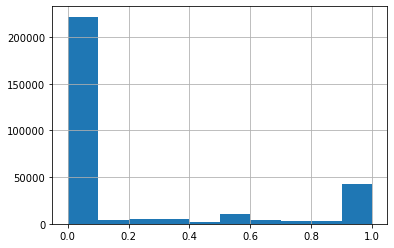

In [20]:
selected_df['prop_neutral'].hist()

<AxesSubplot:>

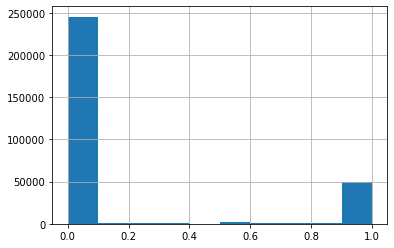

In [21]:
selected_df['prop_agnst'].hist()

<AxesSubplot:>

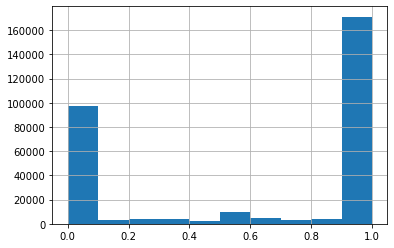

In [22]:
selected_df['prop_pro'].hist()

In [23]:
def get_interval(p_1, p0, p1):
    return (-(p_1)+p0+p1)+(0-p0)

def define_faction(i_val):
    faction = None
    if -0.3 <= i_val <= 0.3:
        faction = 'neutral'
    elif i_val > 0.3:
        faction = 'against gov'
    elif i_val < -0.3:
        faction = 'pro gov'
    return faction

In [24]:
interval_values = []

for idx, row in selected_df.iterrows():
    faction_interval_val = get_interval(row['prop_agnst'], row['prop_neutral'], row['prop_pro'])
    interval_values.append(faction_interval_val)

selected_df['faction_interval_value'] = interval_values

In [25]:
selected_df[['neutral_amount', 'agnst_cpi_amount', 'pro_cpi_amount', 'prop_neutral', 'prop_agnst', 'prop_pro', 'faction_interval_value']].sample(10)

,neutral_amount,agnst_cpi_amount,pro_cpi_amount,prop_neutral,prop_agnst,prop_pro,faction_interval_value
132502,0,0,1,0.000000,0.0,1.000000,1.000000
157722,0,0,6,0.000000,0.0,1.000000,1.000000
83935,2,0,7,0.222222,0.0,0.777778,0.777778
108467,0,0,2,0.000000,0.0,1.000000,1.000000
28895,0,13,0,0.000000,1.0,0.000000,-1.000000
90939,20,0,3,0.869565,0.0,0.130435,0.130435
64449,0,0,3,0.000000,0.0,1.000000,1.000000
300488,2,0,0,1.000000,0.0,0.000000,0.000000
283944,0,0,1,0.000000,0.0,1.000000,1.000000
136564,0,0,4,0.000000,0.0,1.000000,1.000000


In [26]:
selected_df[['neutral_amount', 'agnst_cpi_amount', 'pro_cpi_amount', 'prop_neutral', 'prop_agnst', 'prop_pro', 'faction_interval_value']].loc[[53358]]

,neutral_amount,agnst_cpi_amount,pro_cpi_amount,prop_neutral,prop_agnst,prop_pro,faction_interval_value
53358,50,0,18,0.735294,0.0,0.264706,0.264706


In [27]:
selected_df[['neutral_amount', 'agnst_cpi_amount', 'pro_cpi_amount', 'prop_neutral', 'prop_agnst', 'prop_pro', 'faction_interval_value']].loc[[44935]]

,neutral_amount,agnst_cpi_amount,pro_cpi_amount,prop_neutral,prop_agnst,prop_pro,faction_interval_value
44935,74,1,11,0.860465,0.011628,0.127907,0.116279


In [28]:
selected_df[['neutral_amount', 'agnst_cpi_amount', 'pro_cpi_amount', 'prop_neutral', 'prop_agnst', 'prop_pro', 'faction_interval_value']].loc[[16419]]

,neutral_amount,agnst_cpi_amount,pro_cpi_amount,prop_neutral,prop_agnst,prop_pro,faction_interval_value
16419,36,0,27,0.571429,0.0,0.428571,0.428571


In [29]:
selected_df[['neutral_amount', 'agnst_cpi_amount', 'pro_cpi_amount', 'prop_neutral', 'prop_agnst', 'prop_pro', 'faction_interval_value']].query('faction_interval_value < 0').sample(20)

,neutral_amount,agnst_cpi_amount,pro_cpi_amount,prop_neutral,prop_agnst,prop_pro,faction_interval_value
71149,0,8,0,0.0,1.0,0.0,-1.0
79316,0,2,0,0.0,1.0,0.0,-1.0
33549,0,1,0,0.0,1.0,0.0,-1.0
152843,0,22,0,0.0,1.0,0.0,-1.0
175791,0,1,0,0.0,1.0,0.0,-1.0
101759,0,1,0,0.0,1.0,0.0,-1.0
82008,0,1,0,0.0,1.0,0.0,-1.0
33090,0,1,0,0.0,1.0,0.0,-1.0
20203,0,1,0,0.0,1.0,0.0,-1.0
81132,0,2,0,0.0,1.0,0.0,-1.0


In [30]:
selected_df['faction'] = selected_df['faction_interval_value'].map(lambda x: define_faction(x))

In [31]:
selected_df.query('faction == "neutral"').head()

,user,cpidacovid,cpidapandemia,covid19,cpidacovid19,renanvagabundo,cpidocirco,renansabiadetudo,euautorizopresidente,forabolsonaro,...,cpidogenocidio,hashtag_usage_amount,neutral_amount,agnst_cpi_amount,pro_cpi_amount,prop_neutral,prop_agnst,prop_pro,faction_interval_value,faction
31,andrezamatais,16,0,0,0,0,0,0,0,0,...,0,16,16,0,0,1.000000,0.0,0.000000,0.000000,neutral
34,CHCadinha,117,88,5,0,0,0,0,0,8,...,19,242,210,0,32,0.867769,0.0,0.132231,0.132231,neutral
44,alinelua,17,42,0,1,0,0,0,0,3,...,7,75,60,0,15,0.800000,0.0,0.200000,0.200000,neutral
75,correio,2,0,0,0,0,0,0,0,0,...,0,2,2,0,0,1.000000,0.0,0.000000,0.000000,neutral
82,Doce_Vicio,4,2,0,0,0,0,0,0,1,...,1,8,6,0,2,0.750000,0.0,0.250000,0.250000,neutral


In [32]:
selected_df.query('faction == "pro gov"').head()

,user,cpidacovid,cpidapandemia,covid19,cpidacovid19,renanvagabundo,cpidocirco,renansabiadetudo,euautorizopresidente,forabolsonaro,...,cpidogenocidio,hashtag_usage_amount,neutral_amount,agnst_cpi_amount,pro_cpi_amount,prop_neutral,prop_agnst,prop_pro,faction_interval_value,faction
3,ANA_PAULA_FONS,0,0,0,0,69,0,56,31,0,...,0,156,0,156,0,0.0,1.0,0.0,-1.0,pro gov
4,libolsonaro,0,0,0,0,1,0,10,5,0,...,0,16,0,16,0,0.0,1.0,0.0,-1.0,pro gov
6,gomessamg,0,0,0,0,0,0,7,42,0,...,0,49,0,49,0,0.0,1.0,0.0,-1.0,pro gov
10,ngelomarchioll1,0,0,0,0,109,142,2,0,0,...,0,253,0,253,0,0.0,1.0,0.0,-1.0,pro gov
11,Elmosol,0,0,0,0,1,0,1,0,0,...,0,2,0,2,0,0.0,1.0,0.0,-1.0,pro gov


In [33]:
selected_df.query('faction == "against gov"').head()

,user,cpidacovid,cpidapandemia,covid19,cpidacovid19,renanvagabundo,cpidocirco,renansabiadetudo,euautorizopresidente,forabolsonaro,...,cpidogenocidio,hashtag_usage_amount,neutral_amount,agnst_cpi_amount,pro_cpi_amount,prop_neutral,prop_agnst,prop_pro,faction_interval_value,faction
0,Indignado72,16,3,3,0,0,0,0,0,34,...,0,91,22,0,69,0.241758,0.0,0.758242,0.758242,against gov
1,EscutaZeNinguem,9,2,0,0,0,0,0,0,12,...,0,59,11,0,48,0.186441,0.0,0.813559,0.813559,against gov
2,guinody,0,0,0,0,0,0,0,0,0,...,0,11,0,0,11,0.000000,0.0,1.000000,1.000000,against gov
5,Sandroka131,195,1,0,0,0,0,0,0,79,...,0,288,196,0,92,0.680556,0.0,0.319444,0.319444,against gov
7,thivagando,1,0,0,0,0,0,0,0,3,...,1,7,1,0,6,0.142857,0.0,0.857143,0.857143,against gov


In [34]:
user_cluster = pd.read_parquet('data/user_cluster_result.parquet')
user_cluster.shape

(167896, 3)

In [35]:
selected_df.shape

(301465, 22)

In [36]:
user_cluster.head(5)

,user,description,cluster
0,thetunnes,bandeira brasil jogador valorant simbolo raiva...,0
1,eriicksonsilva,br falo merda vascodagama manutd okcthunder,0
2,DarlyMenconi,obody wins unless everybody wins psicologa bor...,0
3,danconservador,anti comunista bandeira brasil bandeira nunca ...,1
4,SuperTorresmo,astrofisico,0


In [37]:
common_users = []

for idx, row in user_cluster.iterrows():
    if row['user'] in list(selected_df['user'].values):
        common_users.append(row['user'])

In [38]:
print(f'''
Number of users in Cluster Result df: {user_cluster.shape[0]}
Number of users in Selected Hashtags df: {selected_df.shape[0]}
Number of common users among both dfs: {len(common_users)}
''')


Number of users in Cluster Result df: 167896
Number of users in Selected Hashtags df: 301465
Number of common users among both dfs: 111920



In [39]:
user_cluster['cluster'].value_counts()

0    158669
1      9227
Name: cluster, dtype: int64

In [40]:
selected_df['faction'].value_counts()

against gov    197036
pro gov         53948
neutral         50481
Name: faction, dtype: int64

In [41]:
pro_gov_hash = set(selected_df.query("faction == 'pro gov'")['user'].values)
pro_gov_cluster = set(user_cluster.query("cluster == 1")['user'].values)

In [42]:
len(pro_gov_hash.intersection(pro_gov_cluster))

4319

In [73]:
selected_df.head()

,user,cpidacovid,cpidapandemia,covid19,cpidacovid19,renanvagabundo,cpidocirco,renansabiadetudo,euautorizopresidente,forabolsonaro,...,cpidogenocidio,hashtag_usage_amount,neutral_amount,agnst_cpi_amount,pro_cpi_amount,prop_neutral,prop_agnst,prop_pro,faction_interval_value,faction
0,Indignado72,16,3,3,0,0,0,0,0,34,...,0,91,22,0,69,0.241758,0.0,0.758242,0.758242,against gov
1,EscutaZeNinguem,9,2,0,0,0,0,0,0,12,...,0,59,11,0,48,0.186441,0.0,0.813559,0.813559,against gov
2,guinody,0,0,0,0,0,0,0,0,0,...,0,11,0,0,11,0.000000,0.0,1.000000,1.000000,against gov
3,ANA_PAULA_FONS,0,0,0,0,69,0,56,31,0,...,0,156,0,156,0,0.000000,1.0,0.000000,-1.000000,pro gov
4,libolsonaro,0,0,0,0,1,0,10,5,0,...,0,16,0,16,0,0.000000,1.0,0.000000,-1.000000,pro gov


In [37]:
selected_hashtags_list = ['cpidacovid', 'cpidapandemia', 'covid19', 'cpidacovid19', 'renanvagabundo',
                        'cpidocirco', 'renansabiadetudo', 'euautorizopresidente', 'forabolsonaro',
                        'forabolsonarogenocida', 'bolsonarogenocida', 'cpidogenocidio']

temp_df = selected_df[selected_hashtags_list]

In [38]:
temp_df = temp_df.applymap(lambda x: True if x>0 else False)
temp_df['id'] = selected_df['user']
temp_df.head()

,cpidacovid,cpidapandemia,covid19,cpidacovid19,renanvagabundo,cpidocirco,renansabiadetudo,euautorizopresidente,forabolsonaro,forabolsonarogenocida,bolsonarogenocida,cpidogenocidio,id
0,True,True,True,False,False,False,False,False,True,True,True,False,Indignado72
1,True,True,False,False,False,False,False,False,True,True,True,False,EscutaZeNinguem
2,False,False,False,False,False,False,False,False,False,False,True,False,guinody
3,False,False,False,False,True,False,True,True,False,False,False,False,ANA_PAULA_FONS
4,False,False,False,False,True,False,True,True,False,False,False,False,libolsonaro


In [39]:
from upsetplot import from_contents, UpSet

In [40]:
temp_df.shape

(301465, 13)

In [41]:
data = {}

for hashtag in selected_hashtags_list:
    data[hashtag] = []

for idx, row in temp_df.iterrows():
    for hashtag in selected_hashtags_list:
        if temp_df[hashtag][idx]:
            data[hashtag].append(temp_df['id'][idx])

In [42]:
data.keys()

dict_keys(['cpidacovid', 'cpidapandemia', 'covid19', 'cpidacovid19', 'renanvagabundo', 'cpidocirco', 'renansabiadetudo', 'euautorizopresidente', 'forabolsonaro', 'forabolsonarogenocida', 'bolsonarogenocida', 'cpidogenocidio'])

In [43]:
print(data['cpidacovid'][:10])

['Indignado72', 'EscutaZeNinguem', 'Sandroka131', 'thivagando', 'AndreaPorto2021', 'silviacbap', 'DarlyMenconi', 'flintes', 'NaTransversal', 'ptribeirao']


In [44]:
data_plot = from_contents(data)
data_plot.head()

id
cpidacovid cpidapandemia covid19 cpidacovid19 renanvagabundo cpidocirco renansabiadetudo euautorizopresidente forabolsonaro forabolsonarogenocida bolsonarogenocida cpidogenocidio                 
True       True          True    False        False          False      False            False                True          True                  True              False               Indignado72
                         False   False        False          False      False            False                True          True                  True              False           EscutaZeNinguem
                                                                                                                                                                    False               Sandroka131
           False         False   False        False          False      False            False                True          False                 True              True                 thivagando
           True          True    True         False          False      False            False                True          True                  True              True            AndreaPorto2021

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

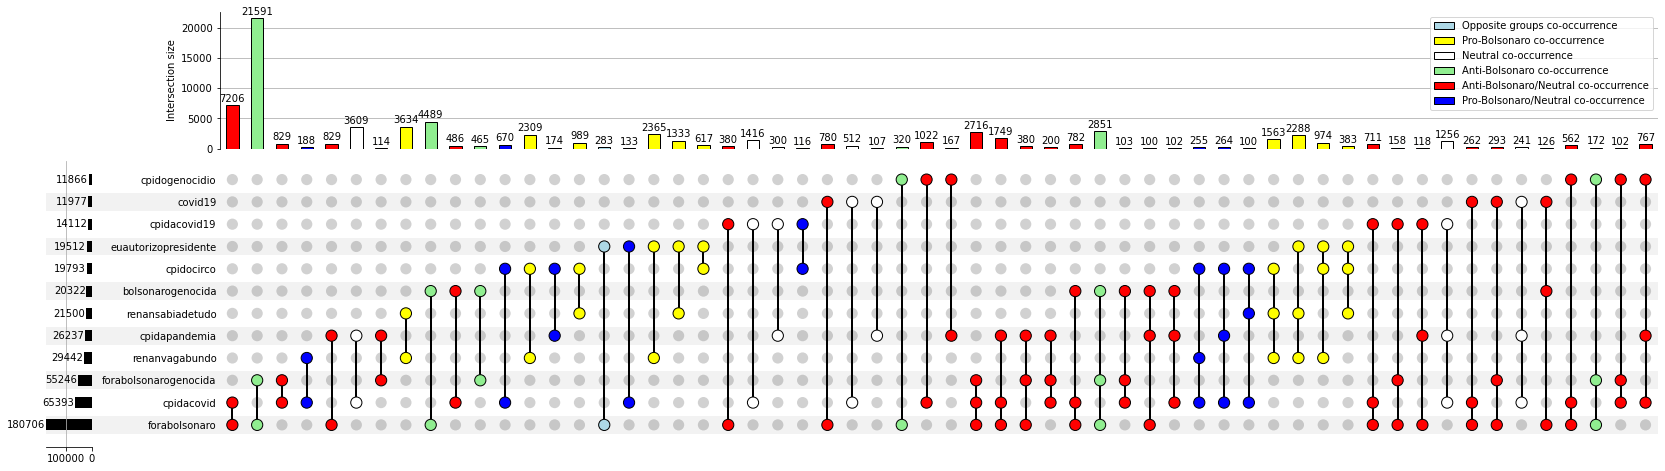

In [45]:
upset = UpSet(data_plot, min_subset_size=100, show_counts=True, max_degree=3, min_degree=2)

upset.style_subsets(present=['euautorizopresidente', 'forabolsonaro'], facecolor='lightblue', edgecolor='black', label='Opposite groups co-occurrence')

upset.style_subsets(present=['renanvagabundo', 'cpidocirco'], facecolor='yellow', edgecolor='black', label='Pro-Bolsonaro co-occurrence')
upset.style_subsets(present=['renanvagabundo', 'renansabiadetudo'], facecolor='yellow', edgecolor='black', label='Pro-Bolsonaro co-occurrence')
upset.style_subsets(present=['renanvagabundo', 'euautorizopresidente'], facecolor='yellow', edgecolor='black', label='Pro-Bolsonaro co-occurrence')
upset.style_subsets(present=['cpidocirco', 'renansabiadetudo'], facecolor='yellow', edgecolor='black', label='Pro-Bolsonaro co-occurrence')
upset.style_subsets(present=['cpidocirco', 'euautorizopresidente'], facecolor='yellow', edgecolor='black', label='Pro-Bolsonaro co-occurrence')
upset.style_subsets(present=['renansabiadetudo', 'euautorizopresidente'], facecolor='yellow', edgecolor='black', label='Pro-Bolsonaro co-occurrence')

upset.style_subsets(present=['cpidacovid', 'cpidapandemia'], facecolor='white', edgecolor='black', label='Neutral co-occurrence')
upset.style_subsets(present=['cpidacovid', 'covid19'], facecolor='white', edgecolor='black', label='Neutral co-occurrence')
upset.style_subsets(present=['cpidacovid', 'cpidacovid19'], facecolor='white', edgecolor='black', label='Neutral co-occurrence')
upset.style_subsets(present=['cpidapandemia', 'covid19'], facecolor='white', edgecolor='black', label='Neutral co-occurrence')
upset.style_subsets(present=['cpidapandemia', 'cpidacovid19'], facecolor='white', edgecolor='black', label='Neutral co-occurrence')
upset.style_subsets(present=['covid19', 'cpidacovid19'], facecolor='white', edgecolor='black', label='Neutral co-occurrence')

upset.style_subsets(present=['forabolsonaro', 'forabolsonarogenocida'], facecolor='lightgreen', edgecolor='black', label='Anti-Bolsonaro co-occurrence')
upset.style_subsets(present=['forabolsonaro', 'bolsonarogenocida'], facecolor='lightgreen', edgecolor='black', label='Anti-Bolsonaro co-occurrence')
upset.style_subsets(present=['forabolsonaro', 'cpidogenocidio'], facecolor='lightgreen', edgecolor='black', label='Anti-Bolsonaro co-occurrence')
upset.style_subsets(present=['forabolsonarogenocida', 'bolsonarogenocida'], facecolor='lightgreen', edgecolor='black', label='Anti-Bolsonaro co-occurrence')
upset.style_subsets(present=['forabolsonarogenocida', 'cpidogenocidio'], facecolor='lightgreen', edgecolor='black', label='Anti-Bolsonaro co-occurrence')
upset.style_subsets(present=['bolsonarogenocida', 'cpidogenocidio'], facecolor='lightgreen', edgecolor='black', label='Anti-Bolsonaro co-occurrence')


upset.style_subsets(present=['cpidacovid', 'forabolsonaro'], facecolor='red', edgecolor='black', label='Anti-Bolsonaro/Neutral co-occurrence')
upset.style_subsets(present=['forabolsonarogenocida', 'cpidacovid'], facecolor='red', edgecolor='black', label='Anti-Bolsonaro/Neutral co-occurrence')
upset.style_subsets(present=['forabolsonarogenocida', 'cpidapandemia'], facecolor='red', edgecolor='black', label='Anti-Bolsonaro/Neutral co-occurrence')
upset.style_subsets(present=['bolsonarogenocida', 'cpidacovid'], facecolor='red', edgecolor='black', label='Anti-Bolsonaro/Neutral co-occurrence')
upset.style_subsets(present=['cpidapandemia', 'forabolsonaro'], facecolor='red', edgecolor='black', label='Anti-Bolsonaro/Neutral co-occurrence')
upset.style_subsets(present=['cpidacovid19', 'forabolsonaro'], facecolor='red', edgecolor='black', label='Anti-Bolsonaro/Neutral co-occurrence')
upset.style_subsets(present=['cpidogenocidio', 'cpidacovid'], facecolor='red', edgecolor='black', label='Anti-Bolsonaro/Neutral co-occurrence')
upset.style_subsets(present=['cpidogenocidio', 'cpidapandemia'], facecolor='red', edgecolor='black', label='Anti-Bolsonaro/Neutral co-occurrence')
upset.style_subsets(present=['covid19', 'forabolsonaro'], facecolor='red', edgecolor='black', label='Anti-Bolsonaro/Neutral co-occurrence')




upset.style_subsets(present=['renanvagabundo', 'cpidacovid'], facecolor='blue', edgecolor='black', label='Pro-Bolsonaro/Neutral co-occurrence')
upset.style_subsets(present=['cpidocirco', 'cpidacovid'], facecolor='blue', edgecolor='black', label='Pro-Bolsonaro/Neutral co-occurrence')
upset.style_subsets(present=['cpidocirco', 'cpidapandemia'], facecolor='blue', edgecolor='black', label='Pro-Bolsonaro/Neutral co-occurrence')
upset.style_subsets(present=['cpidocirco', 'covid19'], facecolor='blue', edgecolor='black', label='Pro-Bolsonaro/Neutral co-occurrence')
upset.style_subsets(present=['euautorizopresidente', 'cpidacovid'], facecolor='blue', edgecolor='black', label='Pro-Bolsonaro/Neutral co-occurrence')
upset.style_subsets(present=['cpidacovid19', 'cpidocirco'], facecolor='blue', edgecolor='black', label='Pro-Bolsonaro/Neutral co-occurrence')



upset.plot()

<AxesSubplot:>

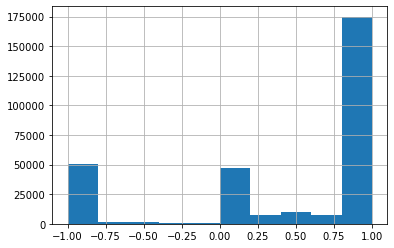

In [46]:
selected_df['faction_interval_value'].hist()

In [47]:
print(f'''
Number of neutral users: {selected_df[['user']+selected_hashtags_list][selected_df['faction']=='neutral'].shape[0]}
Number of users opposite to gov: {selected_df[['user']+selected_hashtags_list][selected_df['faction']=='against gov'].shape[0]}
Number of users pro gov: {selected_df[['user']+selected_hashtags_list][selected_df['faction']=='pro gov'].shape[0]}
''')


Number of neutral users: 50481
Number of users opposite to gov: 197036
Number of users pro gov: 53948



In [48]:
selected_df[['user']+selected_hashtags_list][selected_df['faction']=='neutral'].sample(10)

,user,cpidacovid,cpidapandemia,covid19,cpidacovid19,renanvagabundo,cpidocirco,renansabiadetudo,euautorizopresidente,forabolsonaro,forabolsonarogenocida,bolsonarogenocida,cpidogenocidio
44643,lrgonc,1,0,0,0,0,0,0,0,0,0,0,0
75915,jrickds,2,0,0,0,0,0,0,0,0,0,0,0
63953,vinnaum,5,1,0,0,0,0,0,0,0,0,0,0
57151,ingridoliveer30,3,0,0,0,0,0,0,0,0,0,0,0
227570,laugduran,0,0,1,0,0,0,0,0,0,0,0,0
123167,littlequ44r,3,3,0,5,0,0,0,0,2,1,0,0
102596,FeministaBebada,31,0,0,1,0,0,0,0,1,0,0,0
52286,chelvargas,2,10,0,0,0,0,0,0,0,0,0,0
205297,cbnbrasilia,1,0,0,0,0,0,0,0,0,0,0,0
147735,maurici0camacho,2,0,0,0,0,0,0,0,0,0,0,0


In [49]:
selected_df[['user']+selected_hashtags_list][selected_df['faction']=='against gov'].sample(10)

,user,cpidacovid,cpidapandemia,covid19,cpidacovid19,renanvagabundo,cpidocirco,renansabiadetudo,euautorizopresidente,forabolsonaro,forabolsonarogenocida,bolsonarogenocida,cpidogenocidio
108286,idontcare__tf,0,0,0,0,0,0,0,0,2,1,0,0
247623,thiara_campos,0,0,0,0,0,0,0,0,1,0,0,0
298384,anaaql_,0,0,0,0,0,0,0,0,1,0,1,0
146929,randevu_,0,0,0,0,0,0,0,0,2,0,0,0
51441,RenatoLeite55,0,0,0,0,0,0,0,0,38,0,0,0
127311,emmana_delrey,0,0,0,0,0,0,0,0,1,1,0,0
16624,MaiyconC,6,0,0,0,0,0,0,0,28,4,2,8
231276,evaldo19820000,0,0,0,0,0,0,0,0,1,1,0,0
128247,guimaraesyohana,0,0,0,0,0,0,0,0,1,1,0,0
280981,mari_dellapina,0,0,0,0,0,0,0,0,0,1,0,0


In [50]:
selected_df[['user']+selected_hashtags_list][selected_df['faction']=='pro gov'].sample(10)

,user,cpidacovid,cpidapandemia,covid19,cpidacovid19,renanvagabundo,cpidocirco,renansabiadetudo,euautorizopresidente,forabolsonaro,forabolsonarogenocida,bolsonarogenocida,cpidogenocidio
35880,claudiofico,0,0,0,0,2,1,0,1,0,0,0,0
78920,jcbandrade,0,0,0,0,1,0,0,0,0,0,0,0
161050,Fernando160370,0,0,0,0,0,0,2,0,0,0,0,0
215491,Heidiane12,0,0,0,0,0,1,0,0,0,0,0,0
76480,rubiarabelo,0,0,0,0,4,0,0,0,0,0,0,0
81828,monicamcarvalho,0,0,0,0,1,0,0,0,0,0,0,0
236853,AndreSavio4,0,0,0,0,1,2,0,0,0,0,0,0
91073,MichaelDanglen,1,0,0,0,0,1,0,0,0,0,0,0
22987,OyaemCasa,0,0,0,0,0,0,0,4,0,0,0,0
70403,Mary_morceguete,0,0,0,0,6,0,27,3,0,0,0,0


In [51]:
edges_df = pd.read_parquet('data/networks/complete_network_edges.parquet')

edges_df.shape

(1878862, 4)

In [52]:
edges_df.sample(5)

,Source,Target,LinkType,TweetContent
84566,runner_erik,OGloboPolitica,reply,@OGloboPolitica @jairbolsonaro Eu autorizo bai...
941825,NinaCarmona2,o_antagonista,reply,"@o_antagonista Eu quero ouvir o Gabas, o irmão..."
1130987,JHenriqueFonsec,WagnerPatriaBR,reply,@WagnerPatriaBR @NinaCarmona2 @Reinald33245671...
383785,EdjaneJesus,IracemaHorta,reply,@IracemaHorta @JussaraGama3 As imagens que est...
1007750,IrmaVarao,BrazilFight,reply,@BrazilFight @SrgioLuizFelix3 Com certeza #Ren...


<AxesSubplot:>

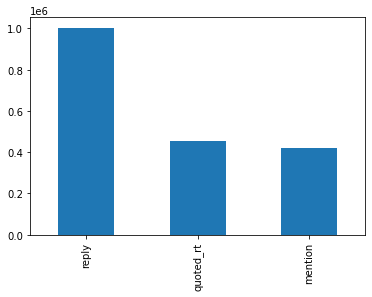

In [53]:
edges_df['LinkType'].value_counts().plot.bar()

In [54]:
selected_groups_interac = []
user_faction_dict = {}

#df to dict
for idx, row in selected_df.iterrows():
    user_faction_dict[row['user']] = row['faction']


for idx, row in edges_df.iterrows():
    if row['Source'] in user_faction_dict.keys() and row['Target'] in user_faction_dict.keys():
        source_faction = user_faction_dict[row['Source']]
        target_faction = user_faction_dict[row['Target']]
        selected_groups_interac.append((row['Source'], row['Target'], f'{source_faction} to {target_faction}', row['LinkType'], row['TweetContent']))

groups_interac_df = pd.DataFrame(columns=['source', 'target', 'factions', 'interac_type','tweet_content'], data=selected_groups_interac)
groups_interac_df.shape

(1261882, 5)

In [55]:
groups_interac_df.sample(10)

,source,target,factions,interac_type,tweet_content
161632,debmattarchedid,profpaulamarisa,pro gov to pro gov,reply,@profpaulamarisa Será que vai ficar só por cau...
990947,DanniLinardi,Sen_Alessandro,neutral to neutral,mention,Esse ai é o maior 171 q já vi passar na #CPIda...
755012,AdenirBrito,ReacaLobo,pro gov to pro gov,reply,@ReacaLobo Sou do Rio Grande do Sul e #EuApoio...
918361,Cricamg,proftulionit,against gov to against gov,quoted_rt,Votar errado MATA!!!! Fica a dica!\n#ForaBolso...
1076722,JacksdaNessa,jornalextra,against gov to neutral,quoted_rt,Presidente #LIXO !\nESTA NEM AÍ PARA A POPULAÇ...
61243,elizia_leite,ribachinaski,pro gov to against gov,reply,@ribachinaski @PolaDaSilva3 @OGloboPolitica @j...
679648,2Lindolpho,DaianeMels,pro gov to pro gov,reply,@DaianeMels 1) Lázaro virou peneira.\n2) Aeron...
657187,EdnaMrcia13,ClaudeLuca_,pro gov to pro gov,reply,@ClaudeLuca_ Subindo 👍\n\n💚💛🇧🇷\n\n #RenanSabia...
675683,JorgeMFLeite1,Martins_Pastor,pro gov to pro gov,quoted_rt,Nada mais verdadeiro do que isso!\nSe liga aí ...
583599,marivarella,juremawerneck,neutral to neutral,mention,"#CPIdaPandemia ""Faltou liderança nacional"", af..."


In [60]:
groups_interac_df.query('target == "folha" and factions == "pro gov to neutral"')

,source,target,factions,interac_type,tweet_content
118,AtosFuturos,folha,pro gov to neutral,reply,@folha .\n\n“CPI da Covid quer investigar...”\...
266,ValbeloC,folha,pro gov to neutral,reply,@folha Cpi da covid fazendo milagres.
2292,peterbrol,folha,pro gov to neutral,reply,@folha Porque não Abrem a #CaixaDePanDORIA
3719,Crisfarias38,folha,pro gov to neutral,reply,@folha O povo quer saber!\n#CaixaDePanDORIA
3936,Luciano_22K,folha,pro gov to neutral,mention,Vamos mandar dória para aquele lugar #@###$#\n...
...,...,...,...,...,...
1257042,lekinho4ever,folha,pro gov to neutral,reply,@folha Ué???\nSe vai ao circo pra rir né não??...
1258021,FredCarvalho77,folha,pro gov to neutral,reply,@folha Kkkk Vaaaaai demaaais! Essa #CPIdoCirco...
1259122,lekinho4ever,folha,pro gov to neutral,reply,@folha Ninguém leva a sério a #CPIdoCirco .\n#...
1261545,AndreMa36582967,folha,pro gov to neutral,mention,"""Instalada no RN, uma CPI faz o trabalho que d..."


In [61]:
groups_interac_df.query('target == "UOLNoticias" and factions == "pro gov to neutral"')

,source,target,factions,interac_type,tweet_content
87,Opif_Pires,UOLNoticias,pro gov to neutral,mention,"Essa coisa esquisita, querendo fazer acareação..."
275,MirandaSa_,UOLNoticias,pro gov to neutral,mention,INCOMPETÊNCIA &amp; INEFICIÊNCIA - Senado Fede...
289,MirandaSa_,UOLNoticias,pro gov to neutral,mention,INFORME-SE(2) - CPI da pandemia: Quem é quem n...
299,mgpd1955,UOLNoticias,pro gov to neutral,mention,MDB ameaça transformar CPI da Covid em pesadel...
1173,pereira87_vp,UOLNoticias,pro gov to neutral,reply,"@UOLNoticias #CaixaDePanDORIA , olha só quem f..."
...,...,...,...,...,...
1257657,CoelhAdilson,UOLNoticias,pro gov to neutral,reply,@UOLNoticias CPI do Circo 🎪 #CPIdoCIRCO
1258669,MIAMONTEC,UOLNoticias,pro gov to neutral,reply,@UOLNoticias Tá de brincadeira! O vírus é chin...
1258808,MirandaSa_,UOLNoticias,pro gov to neutral,mention,AO ESTUDO E REFLEXÃO - Senado Federal: a CPI ...
1259226,paulofilippus,UOLNoticias,pro gov to neutral,mention,Dentre todas as supostas acusações ao PR Bolso...


In [62]:
groups_interac_df.query('target == "Estadao" and factions == "pro gov to neutral"')

,source,target,factions,interac_type,tweet_content
652,pauloalexandrev,Estadao,pro gov to neutral,reply,@Estadao @EstadaoPolitica CPI da Covid protege...
762,Lello_Andress,Estadao,pro gov to neutral,reply,@Estadao @EstadaoPolitica A CPI da covid só te...
1229,Crisfarias38,Estadao,pro gov to neutral,reply,@Estadao @EstadaoPolitica O povo quer saber\n#...
1436,Crisfarias38,Estadao,pro gov to neutral,reply,@Estadao @EstadaoEconomia O povo quer saber!\n...
1589,Crisfarias38,Estadao,pro gov to neutral,reply,@Estadao @EstadaoPolitica É só a ponta do Iceb...
...,...,...,...,...,...
1253535,VilmaReis15,Estadao,pro gov to neutral,mention,Racha na cúpula da CPI da Covid faz governo ve...
1254671,Falviomachamac1,Estadao,pro gov to neutral,reply,@Estadao @EstadaoPolitica Estamos vendo um mom...
1255056,AndrBertoni5,Estadao,pro gov to neutral,reply,@Estadao @EstadaoPolitica Tb essa cpi só servi...
1256450,DeborahPatriota,Estadao,pro gov to neutral,reply,@Estadao Isso é óbvio! Começamos a vacinação e...


In [63]:
groups_interac_df.query('target == "g1" and factions == "pro gov to neutral"')

,source,target,factions,interac_type,tweet_content
1596,Crisfarias38,g1,pro gov to neutral,reply,@g1 Abram\n#CaixaDePanDORIA
2145,scris20231,g1,pro gov to neutral,reply,@g1 #CaixaDePanDORIA abram-na
6891,Fabio06121978,g1,pro gov to neutral,reply,@g1 Esse é o Nosso Presidente!\nSempre colocan...
10255,MaiaFerreira17,g1,pro gov to neutral,reply,@g1 SO TEM CORRUPTO NA FOTO\nTODOS TEM PROCESS...
10448,MaiaFerreira17,g1,pro gov to neutral,reply,@g1 EITA VÃO COLOCAR UM CORRUPTO LADRÃO DE DIN...
...,...,...,...,...,...
1256933,RoderRock,g1,pro gov to neutral,reply,@g1 #imprensamarrom. #CPIdoCirco #CPIdoLula nã...
1257880,fred_pretorian,g1,pro gov to neutral,reply,@g1 #CPIdoCirco ! Palhaços corruptos!🤡
1258909,cledsonjardim,g1,pro gov to neutral,mention,Nossa #MidiaLixo e a #CPIdoCirco precisam se d...
1259425,lekinho4ever,g1,pro gov to neutral,reply,@g1 ihuuu\nBora gargalhar da #CpidoCirco\n\n😂😂...


In [1]:
def percentage(v1, v2):
    quotient = v1/v2
    percent = quotient*100
    return f'{percent:.2f}%'

In [57]:
groups_interac_df['factions'].value_counts()

pro gov to pro gov            415913
against gov to against gov    232019
against gov to neutral        209022
pro gov to neutral            149538
neutral to neutral            127340
pro gov to against gov         45218
against gov to pro gov         36170
neutral to against gov         35944
neutral to pro gov             10718
Name: factions, dtype: int64

In [58]:
total = sum(groups_interac_df['factions'].value_counts().values)
print(total)

1261882


In [9]:
#print(f'''
#Pro-Gov to Pro-Gov: 420,024 ({percentage(420024, total)})
#Anti-Gov to Anti-Gov: 233,985 ({percentage(233985, total)})
#Anti-Gov to Neutral: 210,992 ({percentage(210922, total)})
#Pro-Gov to Neutral-Gov: 150,756 ({percentage(150756, total)})
#Neutral to Neutral: 128,118 ({percentage(128118, total)})
#Pro-Gov to Ani-Gov: 45,385 ({percentage(45385, total)})
#Anti-Gov to Pro-Gov: 36,404 ({percentage(36404, total)})
#Neutral to Anti-Gov: 36,088 ({percentage(36088, total)})
#Neutral to Pro-Gov: 10,834 ({percentage(10834, total)})
#''')

In [8]:
total = 1261882

print(f'''
Pro-Gov to Pro-Gov: 415,913 ({percentage(415913, total)})
Anti-Gov to Anti-Gov: 232,019 ({percentage(232019, total)})
Anti-Gov to Neutral: 209,022 ({percentage(209022, total)})
Pro-Gov to Neutral-Gov: 149,538 ({percentage(149538, total)})
Neutral to Neutral: 127,340 ({percentage(127340, total)})
Pro-Gov to Ani-Gov: 45,218 ({percentage(45218, total)})
Anti-Gov to Pro-Gov: 36,170 ({percentage(36170, total)})
Neutral to Anti-Gov: 35,944 ({percentage(35944, total)})
Neutral to Pro-Gov: 10,718 ({percentage(10718, total)})
''')


Pro-Gov to Pro-Gov: 415,913 (32.96%)
Anti-Gov to Anti-Gov: 232,019 (18.39%)
Anti-Gov to Neutral: 209,022 (16.56%)
Pro-Gov to Neutral-Gov: 149,538 (11.85%)
Neutral to Neutral: 127,340 (10.09%)
Pro-Gov to Ani-Gov: 45,218 (3.58%)
Anti-Gov to Pro-Gov: 36,170 (2.87%)
Neutral to Anti-Gov: 35,944 (2.85%)
Neutral to Pro-Gov: 10,718 (0.85%)



In [407]:
groups_interac_df.to_parquet('data/networks/complete_group_insteracs.parquet', index=False)

In [414]:
pd.DataFrame(columns=['Id', 'Faction'], data=selected_df[['user', 'faction']].values).to_csv('data/networks/nodes_with_faction.csv', index=False)

Number of neutral users: 50481

Number of users opposite to gov: 197036

Number of users pro gov: 53948

In [10]:
total_users = 50481+197036+53948

In [11]:
percentage(197036, total_users)

'65.36%'

In [12]:
percentage(53948, total_users)

'17.90%'